In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Natural language processing
import nltk

# Regular expressions
import re

# Textblob for sentiment analysis
from textblob import TextBlob

# Bert for sentiment analysis
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Vader for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# OpenAI's GPT model
import openai

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Word cloud generation
from wordcloud import WordCloud

# NLTK stopwords and date/time handling
from nltk.corpus import stopwords
from datetime import datetime as dt

# Custom module for fetching market news
from fetch_news import MarketNews

# Random number generation
import random

# Visual parameters
sns.set_style("whitegrid")
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["axes.edgecolor"] = "k"

In [2]:
# Download the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aungs_tko91wk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# If you need help with the MarketNews class
MarketNews?

Init signature: MarketNews(api_key)
Docstring:     
Fetches market news for a given stock ticker and index.

Attributes:
    url (str): URL endpoint for news API.
    query (dict): Parameters for API request.
    articles (list): List of fetched articles.
    data (DataFrame): Processed articles in DataFrame format.
    _api_key (str): API key for accessing the news API.
Init docstring: Initializes MarketNews with an API key.
File:           c:\users\aungs_tko91wk\eigen\wip[sentimentanalysis]\fetch_news\news.py
Type:           type
Subclasses:     

In [4]:
ticker = "DIS"
# index = "NYSE"
# api_key = "xxxxxxxxxxxxxxxxxxxxxxxxxxx"
# base_url = "https://api.markets.sh/api/v1/symbols"

# start = "2022-09-17"
# end = "2023-09-17"

# news = MarketNews(api_key=api_key)

# news.get_news(
#     index,
#     ticker,
#     base_url=base_url,
#     start=start,
#     end=end,
#     limit=10000
# )

In [5]:
headlines = pd.read_csv(f"data/{ticker}_headlines.csv", index_col=0, parse_dates=True)

news_start = headlines.index.min()
news_end = headlines.index.max()

print(f"News start date: {news_start}")
print(f"News end date: {news_end}")
print(f"News timeframe: {(news_end - news_start).days} days")

News start date: 2022-10-06 16:25:00
News end date: 2023-09-14 22:25:20
News timeframe: 343 days


In [6]:
headlines = headlines.dropna()
headlines.head()

,DIS
2022-10-06 16:25:00,JAKKS Pacific: Toy Company On The Mend; Watch ...
2022-10-06 17:06:00,Disney: Sanderson Sisters Lead The Fourth Quarter
2022-10-06 23:25:00,JAKKS Pacific: Relative Undervaluation Makes I...
2022-10-06 23:41:09,ESPN Nears Large New Partnership With DraftKings
2022-10-06 23:57:00,DraftKings Shares Gain 8% After Report of Poss...


In [7]:
stop_words = stopwords.words("english")

def process_text(text, lower_case, remove_stopwords, stop_words, regex_pattern="[^a-zA-Z\s]"):

    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    text = re.sub(r'https?://[A-Za-z0-9./]+','', text)
    text = re.sub(r'https//[A-Za-z0-9./]+','', text)
    text = text.replace("\n", "")
    text = re.sub('@[\w]+', '', text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    if lower_case:
        text = text.lower()
    text = re.sub(regex_pattern, "", text)
    word_list = text.split()
    word_list = [w for w in word_list if len(w) > 1]

    return " ".join([word for word in word_list if word not in stop_words]) if remove_stopwords \
        else " ".join(word_list)

In [8]:
headlines["processed_text"] = headlines[ticker].apply(
    process_text, lower_case=True, remove_stopwords=True, stop_words=stop_words
)

headlines.head()

,DIS,processed_text
2022-10-06 16:25:00,JAKKS Pacific: Toy Company On The Mend; Watch ...,jakks pacific toy company mend watch upcoming
2022-10-06 17:06:00,Disney: Sanderson Sisters Lead The Fourth Quarter,disney sanderson sisters lead fourth quarter
2022-10-06 23:25:00,JAKKS Pacific: Relative Undervaluation Makes I...,jakks pacific relative undervaluation makes buy
2022-10-06 23:41:09,ESPN Nears Large New Partnership With DraftKings,espn nears large new partnership draftkings
2022-10-06 23:57:00,DraftKings Shares Gain 8% After Report of Poss...,draftkings shares gain report possible espn pa...


In [9]:
# indiv_word_series = headlines["processed_text"].str.split().explode()
# all_words = indiv_word_series.to_list()
# redundancies = ["disney", "disneys", "stock"]
# pruned_words = [w for w in all_words if w not in redundancies]
# text_data = " ".join(pruned_words)

# wordcloud = WordCloud(width=800, height=400, background_color="white", random_state=88).generate(text_data)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [10]:
# n_words = 5
# word_count = indiv_word_series.value_counts()
# top_words = word_count[~word_count.index.isin(redundancies)][:n_words]

In [11]:
# def tb_sentiment(text):
#     sentiment_analysis = TextBlob(text)
#     return sentiment_analysis.sentiment

# def tb_extract_scores(text, aspect):
#     if aspect == "polarity":
#         return tb_sentiment(text)[0]
#     elif aspect == "subjectivity":
#         return tb_sentiment(text)[1]

# def tb_extract_sentiment(polarity):
#     return "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"

# headlines_textblob = headlines.copy()
# headlines_textblob["textblob_polarity"] = headlines_textblob["processed_text"].apply(tb_extract_scores, aspect="polarity")
# headlines_textblob["textblob_subjectivity"] = headlines_textblob["processed_text"].apply(tb_extract_scores, aspect="subjectivity")
# headlines_textblob["textblob_sentiment"] = headlines_textblob["textblob_polarity"].apply(tb_extract_sentiment)

headlines_textblob = pd.read_csv("data/textblob_sentiment.csv", index_col=0, parse_dates=True)

In [12]:
headlines_textblob.head()

,DIS,processed_text,textblob_polarity,textblob_subjectivity,textblob_sentiment
2022-10-06 16:25:00,JAKKS Pacific: Toy Company On The Mend; Watch ...,jakks pacific toy company mend watch upcoming,0.000000,0.000000,Neutral
2022-10-06 17:06:00,Disney: Sanderson Sisters Lead The Fourth Quarter,disney sanderson sisters lead fourth quarter,0.000000,0.000000,Neutral
2022-10-06 23:25:00,JAKKS Pacific: Relative Undervaluation Makes I...,jakks pacific relative undervaluation makes buy,0.000000,0.000000,Neutral
2022-10-06 23:41:09,ESPN Nears Large New Partnership With DraftKings,espn nears large new partnership draftkings,0.175325,0.441558,Positive
2022-10-06 23:57:00,DraftKings Shares Gain 8% After Report of Poss...,draftkings shares gain report possible espn pa...,0.000000,1.000000,Neutral


In [13]:
# def bert_preprocess(text, tokenizer):
#     tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
#     with torch.no_grad():
#         outputs = model(**tokens)
#     return int(torch.argmax(outputs.logits)) + 1

# def bert_sentiment(logit):
#     return "Positive" if logit > 3 else "Negative" if logit < 3 else "Neutral"

# def bert_extract_sentiment(text, tokenizer):
#     logit = bert_preprocess(text, tokenizer)
#     return bert_sentiment(logit)

# tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
# model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# headlines_bert = headlines.copy()
# headlines_bert["bert_sentiment"] = headlines_bert[ticker].apply(bert_extract_sentiment, tokenizer=tokenizer)

headlines_bert = pd.read_csv("data/bert_sentiment.csv", index_col=0, parse_dates=True)

In [14]:
headlines_bert.head()

,DIS,processed_text,bert_sentiment
2022-10-06 16:25:00,JAKKS Pacific: Toy Company On The Mend; Watch ...,jakks pacific toy company mend watch upcoming,Positive
2022-10-06 17:06:00,Disney: Sanderson Sisters Lead The Fourth Quarter,disney sanderson sisters lead fourth quarter,Positive
2022-10-06 23:25:00,JAKKS Pacific: Relative Undervaluation Makes I...,jakks pacific relative undervaluation makes buy,Neutral
2022-10-06 23:41:09,ESPN Nears Large New Partnership With DraftKings,espn nears large new partnership draftkings,Positive
2022-10-06 23:57:00,DraftKings Shares Gain 8% After Report of Poss...,draftkings shares gain report possible espn pa...,Negative


In [15]:
# vader = SentimentIntensityAnalyzer()

# def vader_extract_scores(text, vader):
#     return vader.polarity_scores(text)

# def vader_get_score(text, vader, score):
#     return vader_extract_scores(text, vader)[score]

# def vader_extract_sentiment(text, vader):
#     score = vader_get_score(text, vader, score="compound")
#     return "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"

# headlines_vader = headlines.copy()
# headlines_vader["vader_neu"] = headlines_vader["processed_text"].apply(vader_get_score, vader=vader, score="neu")
# headlines_vader["vader_pos"] = headlines_vader["processed_text"].apply(vader_get_score, vader=vader, score="pos")
# headlines_vader["vader_neg"] = headlines_vader["processed_text"].apply(vader_get_score, vader=vader, score="neg")
# headlines_vader["vader_compound"] = headlines_vader["processed_text"].apply(vader_get_score, vader=vader, score="compound")
# headlines_vader["vader_sentiment"] = headlines_vader["processed_text"].apply(vader_extract_sentiment, vader=vader)

headlines_vader = pd.read_csv("data/vader_sentiment.csv", index_col=0, parse_dates=True)
headlines_vader.head()

,DIS,processed_text,vader_neu,vader_pos,vader_neg,vader_compound,vader_sentiment
2022-10-06 16:25:00,JAKKS Pacific: Toy Company On The Mend; Watch ...,jakks pacific toy company mend watch upcoming,1.000,0.000,0.0,0.0000,Neutral
2022-10-06 17:06:00,Disney: Sanderson Sisters Lead The Fourth Quarter,disney sanderson sisters lead fourth quarter,1.000,0.000,0.0,0.0000,Neutral
2022-10-06 23:25:00,JAKKS Pacific: Relative Undervaluation Makes I...,jakks pacific relative undervaluation makes buy,1.000,0.000,0.0,0.0000,Neutral
2022-10-06 23:41:09,ESPN Nears Large New Partnership With DraftKings,espn nears large new partnership draftkings,1.000,0.000,0.0,0.0000,Neutral
2022-10-06 23:57:00,DraftKings Shares Gain 8% After Report of Poss...,draftkings shares gain report possible espn pa...,0.472,0.528,0.0,0.6808,Positive


In [16]:
# tb_sentiment = headlines_textblob["textblob_sentiment"]
# bert_sentiment = headlines_bert["bert_sentiment"]
# vader_sentiment = headlines_vader["vader_sentiment"]

# sentiments = pd.concat([tb_sentiment, bert_sentiment, vader_sentiment], axis=1)
# sentiment_analysis = pd.concat([headlines, sentiments], axis=1)

# sentiment_analysis

In [17]:
def gpt_sentiment(headline, api_key, model="gpt-3.5-turbo-16k"):
    """
    Function to ask a question to ChatGPT.
    
    Parameters:
    - question (str): The question to ask.
    - model (str): The model to use, default is "gpt-3.5-turbo-16k".
    
    Returns:
    - str: The answer from ChatGPT
    """
    
    openai.api_key = api_key
    
    # Create the conversation messages list
    messages = [
        {"role": "system", "content": \
         "You are a helpful assistant who will be performing sentiment analysis. \
         Your task is to respond with 'Positive', 'Negative', or 'Neutral', and nothing else."},
        {"role": "user", "content": f"What is the sentiment of the following headline: {headline}"}
    ]
    
    # Make the API call
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
    )
    
    # Extract the assistant's reply
    answer = response['choices'][0]['message']['content']
    return answer

OPENAI_API_KEY = "xxxxxxxxxxxxxxxxxxxxxxxx"

In [18]:
# sentiment_analysis["chatgpt_sentiment"] = sentiment_analysis[ticker].apply(gpt_sentiment, api_key=OPENAI_API_KEY)

sentiment_analysis = pd.read_csv("data/sentiment_analysis.csv", index_col=0, parse_dates=True)
sentiment_analysis.head()

,DIS,processed_text,textblob_sentiment,bert_sentiment,vader_sentiment,chatgpt_sentiment
2022-10-06 16:25:00,JAKKS Pacific: Toy Company On The Mend; Watch ...,jakks pacific toy company mend watch upcoming,Neutral,Positive,Neutral,Neutral
2022-10-06 17:06:00,Disney: Sanderson Sisters Lead The Fourth Quarter,disney sanderson sisters lead fourth quarter,Neutral,Positive,Neutral,Neutral
2022-10-06 23:25:00,JAKKS Pacific: Relative Undervaluation Makes I...,jakks pacific relative undervaluation makes buy,Neutral,Neutral,Neutral,Positive
2022-10-06 23:41:09,ESPN Nears Large New Partnership With DraftKings,espn nears large new partnership draftkings,Positive,Positive,Neutral,Neutral
2022-10-06 23:57:00,DraftKings Shares Gain 8% After Report of Poss...,draftkings shares gain report possible espn pa...,Neutral,Negative,Positive,Positive


In [19]:
# Function to check if there are different sentiments from three models
def different_sentiments(row):
    return len(set([row["textblob_sentiment"], row["bert_sentiment"], row["vader_sentiment"]])) == 3

# Drop the "processed_text" column from the sentiment_analysis DataFrame
zoom_in = sentiment_analysis.drop("processed_text", axis=1)

# Filter rows where the chatgpt_sentiment is "Negative"
chatgpt_negative = zoom_in["chatgpt_sentiment"] == "Negative"

# Filter rows where the chatgpt_sentiment is "Neutral"
chatgpt_neutral = zoom_in["chatgpt_sentiment"] == "Neutral"

# Filter rows where the chatgpt_sentiment is "Positive"
chatgpt_positive = zoom_in["chatgpt_sentiment"] == "Positive"

# Apply the different_sentiments function to each row to check if there are differing sentiments from other models
disagreeing_other_models = zoom_in.apply(lambda row: different_sentiments(row), axis=1)

In [20]:
# Define the number of samples to select
n_samples = 3

# Filter rows where chatgpt_sentiment is "Neutral" and there is a disagreement with other models
comparison_1 = zoom_in[chatgpt_neutral & disagreeing_other_models]

# Randomly select 'n_samples' rows from the filtered data with a fixed random state for reproducibility
sample_1 = comparison_1.sample(n_samples, random_state=42)

sample_1

,DIS,textblob_sentiment,bert_sentiment,vader_sentiment,chatgpt_sentiment
2023-05-11 14:41:18,Remote and hybrid work look set to continue ac...,Negative,Positive,Neutral,Neutral
2023-04-03 20:53:41,Disney-DeSantis war of words heats up at annua...,Neutral,Positive,Negative,Neutral
2022-11-25 16:52:42,Apple Buying Manchester United? More Like Chin...,Neutral,Negative,Positive,Neutral


In [21]:
# Inspect the article headlines in sample 1
sample_1[ticker].to_list()

['Remote and hybrid work look set to continue across Europe',
 'Disney-DeSantis war of words heats up at annual meeting',
 'Apple Buying Manchester United? More Like Chinese Art Marrying French Rap']

In [22]:
# Filter rows where chatgpt_sentiment is "Positive" and there is a disagreement with other models
comparison_2 = zoom_in[chatgpt_positive & disagreeing_other_models]

# Randomly select 'n_samples' rows from the filtered data with a fixed random state for reproducibility
sample_2 = comparison_2.sample(n_samples, random_state=42)

sample_2

,DIS,textblob_sentiment,bert_sentiment,vader_sentiment,chatgpt_sentiment
2023-08-15 18:02:54,Linear TV viewing sinks below 50% as streaming...,Positive,Negative,Neutral,Positive
2023-06-24 05:21:51,Directors Guild of America votes to ratify new...,Positive,Negative,Neutral,Positive
2022-10-06 23:57:00,DraftKings Shares Gain 8% After Report of Poss...,Neutral,Negative,Positive,Positive


In [23]:
# Inspect the article headlines in sample 2
sample_2[ticker].to_list()

['Linear TV viewing sinks below 50% as streaming soars to new heights',
 'Directors Guild of America votes to ratify new contract with studios',
 'DraftKings Shares Gain 8% After Report of Possible ESPN Partnership']

In [24]:
# Filter rows where chatgpt_sentiment is "Negative" and there is a disagreement with other models
comparison_3 = zoom_in[chatgpt_negative & disagreeing_other_models]

# Randomly select 'n_samples' rows from the filtered data with a fixed random state for reproducibility
sample_3 = comparison_3.sample(n_samples, random_state=42)

sample_3

,DIS,textblob_sentiment,bert_sentiment,vader_sentiment,chatgpt_sentiment
2023-03-30 18:23:39,ABC News lays off several senior executives am...,Neutral,Positive,Negative,Negative
2022-11-29 04:36:40,Hoping to beat the tourist crowd on your trip ...,Neutral,Negative,Positive,Negative
2023-04-05 00:08:55,How Disney and DeSantis started feuding,Neutral,Positive,Negative,Negative


In [25]:
# Inspect the article headlines in sample 3
sample_3[ticker].to_list()

['ABC News lays off several senior executives amid broader Disney cost-cutting in ‘shock’ to newsroom',
 'Hoping to beat the tourist crowd on your trip to Japan? That ship has sailed',
 'How Disney and DeSantis started feuding']

In [26]:
# Function to remove redundant words from a row of text
def remove_redundant_words(row, redundancies):
    row["processed_text"] = [w for w in row["processed_text"] if w not in redundancies]
    return row

# Function to concatenate lists of words into entire strings
def get_entire_strings(*texts):
    entire_strings = []
    for text in texts:
        entire_strings.append(" ".join(text.explode()))
    return tuple(entire_strings)

# Function to generate WordClouds from strings
def generate_wcs(*strings):
    wcs = []
    for string in strings:
        wc = WordCloud(background_color="white", height=400, width=800, colormap="Dark2")
        wcs.append(wc.generate(string))
    return tuple(wcs)

# Function to plot a WordCloud
def plot_wc(wc, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Copying relevant columns and renaming them
true_labels = sentiment_analysis[[ticker, "chatgpt_sentiment"]].copy()
true_labels.columns = [ticker, "sentiment"]

# Preprocessing text data
true_labels["processed_text"] = true_labels[ticker].apply(process_text, lower_case=True, remove_stopwords=True, stop_words=stop_words)
true_labels["processed_text"] = true_labels["processed_text"].str.split()
true_labels = true_labels[[ticker, "processed_text", "sentiment"]]

# Separating data into positive, neutral, and negative sentiments
positive = true_labels["sentiment"] == "Positive"
neutral = true_labels["sentiment"] == "Neutral"
negative = true_labels["sentiment"] == "Negative"

# List of redundant words to remove
redundant_words = ["disney"]

# Applying the remove_redundant_words function to each sentiment group
true_labels_pos = true_labels[positive].apply(remove_redundant_words, redundancies=redundant_words, axis=1)
true_labels_neg = true_labels[negative].apply(remove_redundant_words, redundancies=redundant_words, axis=1)
true_labels_neu = true_labels[neutral].apply(remove_redundant_words, redundancies=redundant_words, axis=1)

# Concatenating processed text into entire strings for each sentiment
pos_words, neu_words, neg_words = get_entire_strings(
    true_labels_pos["processed_text"], 
    true_labels_neu["processed_text"], 
    true_labels_neg["processed_text"]
)

# Generating WordClouds for each sentiment
pos_wc, neg_wc, neu_wc = generate_wcs(pos_words, neg_words, neu_words)

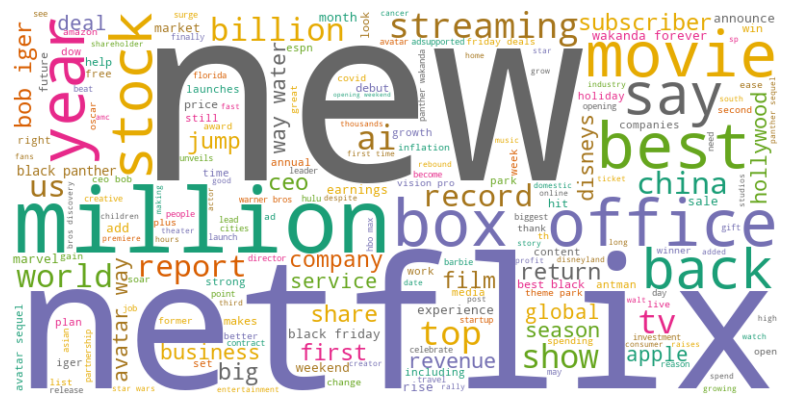

In [27]:
plot_wc(pos_wc)

In [35]:
true_labels[positive][true_labels[positive][ticker].str.lower().str.contains("mandalorian")][-5:]

,DIS,processed_text,sentiment
2022-11-14 19:19:52,Disney+ has a new adorable short film for ‘The...,"[disney, new, adorable, short, film, mandalori...",Positive
2022-12-01 22:33:20,The Mandalorian’s third season premieres on Ma...,"[mandalorians, third, season, premieres, march...",Positive
2023-01-17 16:38:05,Disney+ releases full trailer for ‘The Mandalo...,"[disney, releases, full, trailer, mandalorian,...",Positive


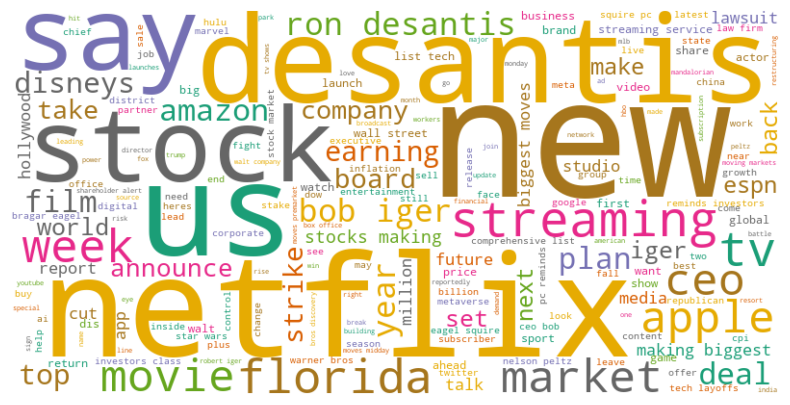

In [ ]:
plot_wc(neu_wc)

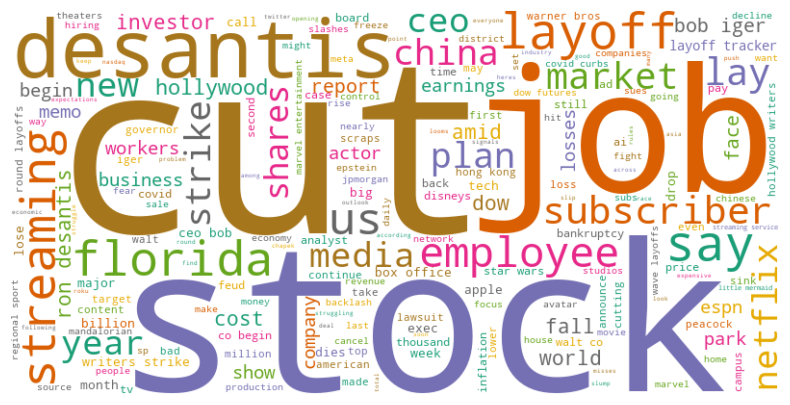

In [ ]:
plot_wc(neg_wc)